<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

$$
\begin{align}
\max_{v,p,t,e,a} \quad & f^T v \\
\text{subject to} \quad & Sv = 0, \\
   & l \leq v \leq u, \\
   & \sum p \leq P, && \text{P: total protein mass} \\
   & C e = p,  && \text{C: protein complex stoichiometry}  \\
   & v_j \leq \sum_{i\in r(j)} k^\text{eff}_{ij} e_i, && \text{r(j): enzymes catalyzing reaction j} \\
   & t_i = p_i / w_i && \text{Scaling RNA (transcript, $t$)-to-protein by a factor $w$. Simplest case: uniform scaling.} \\
   & \log_2(t_i) = \log_2(t^0_i) + R_i a,  && \text{R: log-linear regulatory constraints, $R_i$: row $i$} \\
   & t \geq \delta
\end{align}
$$
where $p^0$ is a constant reference vector (log_2 transformed), and $\delta$ is a small number (e.g., 0.01 / P), and $w_i$ are RNA-to-protein scaling weights, $p$ is protein, $e$ is enzyme complex, $t$ is transcript, $a$ is regulatory component activity.

This problem has the general form:

$$
\begin{align}
\max_{x} \quad & f^T x \\
\text{subject to} \quad & l \leq Ax \leq u, \\     
   & \log(Cx) + Dx = b
\end{align}
$$

$$
\begin{align}
\max_{x,y} \quad & f^T x \\
\text{subject to} \quad & l \leq Ax \leq u, \\     
   & y + Dx = b \\
   & y_i = \log(x_j)
\end{align}
$$

Moving $y_i=\log(x_j)$ into objective with augmented Lagrangian should make the constraint be solved exactly.  Interior point also appropriate?

The log constraint comes from:

ICA-equivalent form:
$$
\begin{align}
\log_2(p) - \log_2(p^0) &= Ma
\end{align}
$$

$$
\begin{align}
\log_2(X) - \log_2(X^0) &= SA
\end{align}
$$

Note: $\log(x)$ is quasiconvex on $x > 0$.

Can use the augmented Lagrangian of MINOS.

In [165]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [161]:
%matplotlib inline

ICA values

In [45]:
df_X0 = pd.read_csv('../data/data_files/log_tpm.csv', index_col=0)
df_X = pd.read_csv('../data/data_files/log_tpm_norm.csv', index_col=0)
df_M = pd.read_csv('../data/data_files/M.csv', index_col=0)
df_A = pd.read_csv('../data/data_files/A.csv', index_col=0)

In [185]:
X0 = df_X0.to_numpy()
X = df_X.to_numpy()
A = df_A.to_numpy()
M = df_M.to_numpy()
MA = np.dot(M,A)

In [186]:
print('X not norm:', df_X0.min().min(), df_X0.max().max())
print('X norm:', df_X.min().min(), df_X.max().max())

X not norm: 0.0 16.4019957054125
X norm: -11.336737814951801 12.831169252022299


df_A.head()

In [197]:
### X as fold change:
m = X0.shape[0]
xref = np.log2(df_X0.iloc[:,:2].mean(1)+1.).to_numpy()
xref = xref.reshape((m,1))
ncond = X0.shape[1]
Xref = np.outer(xref, np.ones((1,ncond)))
Xf = np.log2(X0+1) - Xref

(array([4.00000e+00, 1.60000e+01, 9.00000e+00, 2.20000e+01, 3.20000e+01,
        7.00000e+01, 7.10000e+01, 8.50000e+01, 1.11000e+02, 9.70000e+01,
        1.65000e+02, 2.17000e+02, 2.72000e+02, 3.30000e+02, 4.01000e+02,
        5.16000e+02, 6.98000e+02, 9.23000e+02, 1.22600e+03, 1.56400e+03,
        2.34100e+03, 3.40800e+03, 5.22200e+03, 8.79300e+03, 1.72220e+04,
        3.90220e+04, 1.02523e+05, 2.67122e+05, 3.62088e+05, 1.61384e+05,
        6.06320e+04, 2.56720e+04, 1.20110e+04, 6.37200e+03, 3.61900e+03,
        2.23500e+03, 1.36500e+03, 9.15000e+02, 6.36000e+02, 3.98000e+02,
        2.72000e+02, 2.10000e+02, 1.45000e+02, 7.20000e+01, 3.70000e+01,
        2.00000e+01, 1.40000e+01, 9.00000e+00, 5.00000e+00, 1.00000e+00]),
 array([-10.0253218 ,  -9.66954844,  -9.31377507,  -8.95800171,
         -8.60222834,  -8.24645498,  -7.89068161,  -7.53490825,
         -7.17913489,  -6.82336152,  -6.46758816,  -6.11181479,
         -5.75604143,  -5.40026806,  -5.0444947 ,  -4.68872134,
         -4.

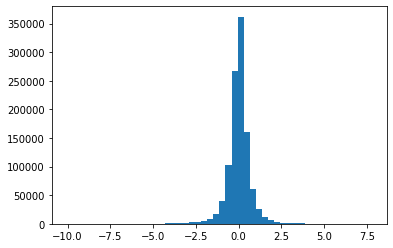

In [198]:
plt.hist((Xf - MA).flatten(), 50)